In [1]:
# import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# read in csv file
df = pd.read_csv('csv_files/p1feature-selection.csv', index_col=0)
df.head()

,C1,C4,C6p,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p,Industry_Bins,Y1,Y2
0,0.458312,0.630418,0.788811,0.278285,0.471242,0.534307,0.617569,0.567375,0.462525,0.532463,0.478776,1.0,0,1,0,1
1,1.000000,0.384735,0.000000,0.197644,1.000000,0.545709,0.521720,0.489104,0.271483,0.667685,0.474754,0.0,1,1,1,0
2,0.327366,0.582011,0.000000,0.105035,0.406077,0.524798,0.622040,0.773408,1.000000,0.324790,0.514761,1.0,1,1,1,0
3,0.814322,0.578004,0.000000,0.112988,0.396940,0.268780,0.694834,0.769738,1.000000,0.386674,0.660248,1.0,1,1,1,1
4,0.286445,0.259982,0.529150,0.977212,0.453073,0.394649,0.424900,0.411101,0.420367,0.592646,0.504014,1.0,0,3,0,1


In [3]:
dfb = df.filter(['C2', 'C3p', 'Industry_Bins', 'Y1','Y2'])
dfb.head()

,C2,C3p,Industry_Bins,Y1,Y2
0,1.0,0,1,0,1
1,0.0,1,1,1,0
2,1.0,1,1,1,0
3,1.0,1,1,1,1
4,1.0,0,3,0,1


In [4]:
df = df.drop(['C2','C3p','Industry_Bins','Y1','Y2'],axis=1)
df.head()

,C1,C4,C6p,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p
0,0.458312,0.630418,0.788811,0.278285,0.471242,0.534307,0.617569,0.567375,0.462525,0.532463,0.478776
1,1.000000,0.384735,0.000000,0.197644,1.000000,0.545709,0.521720,0.489104,0.271483,0.667685,0.474754
2,0.327366,0.582011,0.000000,0.105035,0.406077,0.524798,0.622040,0.773408,1.000000,0.324790,0.514761
3,0.814322,0.578004,0.000000,0.112988,0.396940,0.268780,0.694834,0.769738,1.000000,0.386674,0.660248
4,0.286445,0.259982,0.529150,0.977212,0.453073,0.394649,0.424900,0.411101,0.420367,0.592646,0.504014


In [5]:
# convert the Dataframe to a Numpy array
# makes data easier to work with 
array = df.values
X = array[:,:] #features

**KBinsDiscretizer**

In [6]:
# define the variables that will hold the KBinsDiscretizer function
# bins=4 to get around the issue with strategy=quantile 
bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
# fit the data
bins.fit(X)  
# transform the data 
x_binned = bins.transform(X)
x_binned

array([[1., 2., 3., ..., 1., 2., 1.],
       [3., 1., 0., ..., 1., 2., 1.],
       [1., 2., 0., ..., 3., 1., 2.],
       ...,
       [1., 2., 0., ..., 1., 2., 1.],
       [1., 2., 3., ..., 2., 1., 2.],
       [3., 2., 2., ..., 3., 2., 2.]])

In [7]:
import matplotlib.pyplot as plt

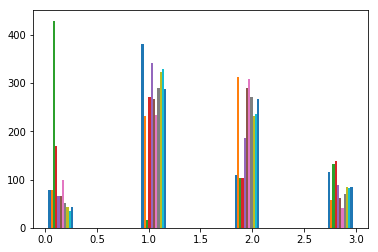

In [8]:
# visially show the new bins on a histogram 
plt.hist(x_binned)
plt.show()

In [9]:
# put the array back into a dataframe
df2 = pd.DataFrame(x_binned)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0
1,3.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0
2,1.0,2.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0
3,3.0,2.0,0.0,0.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0
4,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


In [10]:
# look at the dtypes of the new dataframe 
df2.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object

In [11]:
# change the dtype of the dataframe 
df2 = df2.astype(dtype='int64')
# verify that dtypes were changed 
df2.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
dtype: object

In [12]:
# create a new array for the new dataframe we will run OneHotEncoder on 
array = df2.values
X2 = array[:, :]
X2

array([[1, 2, 3, ..., 1, 2, 1],
       [3, 1, 0, ..., 1, 2, 1],
       [1, 2, 0, ..., 3, 1, 2],
       ...,
       [1, 2, 0, ..., 1, 2, 1],
       [1, 2, 3, ..., 2, 1, 2],
       [3, 2, 2, ..., 3, 2, 2]])

**OneHotEncoder**

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
# define the variable that will hold the OneHotEncoder function
encoder = OneHotEncoder(handle_unknown='ignore')
# define the features we will run through the OneHotEncoder
features = X2
# fit the data
encoder.fit(features)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [15]:
# get the names of the new columns. we will use these later 
names = encoder.get_feature_names()
names

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x1_0', 'x1_1', 'x1_2', 'x1_3',
       'x2_0', 'x2_1', 'x2_2', 'x2_3', 'x3_0', 'x3_1', 'x3_2', 'x3_3',
       'x4_0', 'x4_1', 'x4_2', 'x4_3', 'x5_0', 'x5_1', 'x5_2', 'x5_3',
       'x6_0', 'x6_1', 'x6_2', 'x6_3', 'x7_0', 'x7_1', 'x7_2', 'x7_3',
       'x8_0', 'x8_1', 'x8_2', 'x8_3', 'x9_0', 'x9_1', 'x9_2', 'x9_3',
       'x10_0', 'x10_1', 'x10_2', 'x10_3'], dtype=object)

In [16]:
names2 = ['C1_0', 'C1_1','C1_2', 'C1_3','C4_0', 'C4_1','C4_2','C4_3', 'C6p_0', 'C6p_1', 'C6p_2', 'C6p_3',
          'C7_0', 'C7_1', 'C7_2', 'C7_3', 'C5p_0','C5p_1','C5p_2','C5p_3', 'T4p_0','T4p_1', 'T4p_2','T4p_3',
          'T3p_0','T3p_1','T3p_2','T3p_3', 'T5p_0','T5p_1','T5p_2','T5p_3', 'S1p_0','S1p_1','S1p_2','S1p_3',
         'S2p_0','S2p_1','S2p_2','S2p_3','S3p_0','S3p_1','S3p_2','S3p_3']
names2

['C1_0',
 'C1_1',
 'C1_2',
 'C1_3',
 'C4_0',
 'C4_1',
 'C4_2',
 'C4_3',
 'C6p_0',
 'C6p_1',
 'C6p_2',
 'C6p_3',
 'C7_0',
 'C7_1',
 'C7_2',
 'C7_3',
 'C5p_0',
 'C5p_1',
 'C5p_2',
 'C5p_3',
 'T4p_0',
 'T4p_1',
 'T4p_2',
 'T4p_3',
 'T3p_0',
 'T3p_1',
 'T3p_2',
 'T3p_3',
 'T5p_0',
 'T5p_1',
 'T5p_2',
 'T5p_3',
 'S1p_0',
 'S1p_1',
 'S1p_2',
 'S1p_3',
 'S2p_0',
 'S2p_1',
 'S2p_2',
 'S2p_3',
 'S3p_0',
 'S3p_1',
 'S3p_2',
 'S3p_3']

In [17]:
# define the variable that will hold the transformed data 
onehotlabels = encoder.transform(features).toarray()

onehotlabels.shape

(682, 44)

In [18]:
# print out onehotlabels 
onehotlabels

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
# convert array to dataframe 
df_encode = pd.DataFrame(onehotlabels, columns=names2)
df_encode.head()

,C1_0,C1_1,C1_2,C1_3,C4_0,C4_1,C4_2,C4_3,C6p_0,C6p_1,...,S1p_2,S1p_3,S2p_0,S2p_1,S2p_2,S2p_3,S3p_0,S3p_1,S3p_2,S3p_3
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df = pd.concat([df_encode,dfb], axis=1)
df.head()

,C1_0,C1_1,C1_2,C1_3,C4_0,C4_1,C4_2,C4_3,C6p_0,C6p_1,...,S2p_3,S3p_0,S3p_1,S3p_2,S3p_3,C2,C3p,Industry_Bins,Y1,Y2
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,1
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,3,0,1


In [21]:
df6 = df.filter(['C6p_0','C6p_1','C6p_2','C6p_3','Y1','Y2'],axis=1)
df6.head()

,C6p_0,C6p_1,C6p_2,C6p_3,Y1,Y2
0,0.0,0.0,0.0,1.0,0,1
1,1.0,0.0,0.0,0.0,1,0
2,1.0,0.0,0.0,0.0,1,0
3,1.0,0.0,0.0,0.0,1,1
4,0.0,0.0,1.0,0.0,0,1


In [22]:
df = df.drop(['C6p_0','C6p_1','C6p_2','C6p_3','Y1','Y2'],axis=1)
df.head()

,C1_0,C1_1,C1_2,C1_3,C4_0,C4_1,C4_2,C4_3,C7_0,C7_1,...,S2p_1,S2p_2,S2p_3,S3p_0,S3p_1,S3p_2,S3p_3,C2,C3p,Industry_Bins
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,3


In [23]:
df = pd.concat([df,df6],axis=1)
df.head()

,C1_0,C1_1,C1_2,C1_3,C4_0,C4_1,C4_2,C4_3,C7_0,C7_1,...,S3p_3,C2,C3p,Industry_Bins,C6p_0,C6p_1,C6p_2,C6p_3,Y1,Y2
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0,1,0.0,0.0,0.0,1.0,0,1
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,1,1.0,0.0,0.0,0.0,1,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1,1,1.0,0.0,0.0,0.0,1,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1,1,1.0,0.0,0.0,0.0,1,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,3,0.0,0.0,1.0,0.0,0,1


In [24]:
df.to_csv('csv_files/cont_binning_p1.csv')